<h3><center>TITANIC DATA STUDIO</center></h3>
<p><center>El objetivo de este estudio es conocer con datos, la tragedia del Titanic</center></p>
<p><center>-----------------------------------------------------------------------------------------------------------------------</center></p>
<p><center>Para ello, se realizó una búsqueda de datos en la web de <a href="https://www.kaggle.com/">Kaggle</a> y se obtuvieron los datos de la tabla <a href="https://www.kaggle.com/c/titanic/data">Titanic</a></p>


~~~ 
         _ 
        / \
    __/    \_
   /_  -  \  \                      ,:',:`, ' :'   ':'   ':'  ':':' :':':':':':':':'
  / / /     \ \                  __||_||_||_||___
 |    |     / |             ____[""""""""""""""""]___
 /   /     \   \            \ " '''''''''''''''''''' \
 01110011 01110000 01101111 01101001 01101100 01100101 01110010 00100000 01110011 01100101 00100000 01110110 01100001 00100000 01100001 00100000 01101000 01110101 01101110 01100100 01101001 01110010 
 ~~~


<p><center>Comenzamos importando las librerias necesarias</center></p>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<p><center>Procedemos a leer y jugar con los archivos csv mediante Pandas</center></p>


In [2]:

train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
boats = pd.read_csv('Lifeboats.csv')

In [3]:
#ver el numero de filas y columnas de cada dataframe

print(train.shape, "/" , test.shape, "/",boats.shape) 


(891, 12) / (418, 11) / (18, 9)


In [4]:
#Ver los valores nulos en los dataframes test y entrenamiento
print("train data:\n",train.isnull().sum() ,"\n\n", "\ntesting data:\n",test.isnull().sum())


train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

 
testing data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Vamos a rellenar los valores faltantes por la media de los mismos

In [5]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(train['Age'].mean(), inplace = True)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train['Embarked'].fillna('S', inplace = True)

<AxesSubplot:>

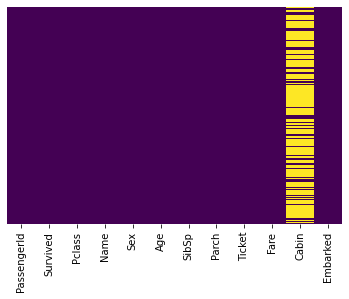

In [6]:
#Podemos comprobar como van los datos como alternativas con la generación de un mapa de calor

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


<AxesSubplot:>

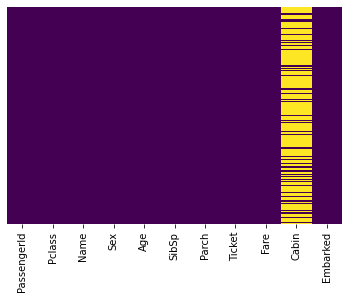

In [7]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Comprobamos el porcentaje de datos nulos de cabin una vez más, si son mayores a un 70% se eliminan debido a que no es posible trabajar con ellos

In [8]:
#forma rápida de comprobar el valor en % 
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

In [9]:
test.isnull().sum()/len(test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [10]:
#Al ser mayor a 70 en los dos casos, procedemos a eliminar

train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

<AxesSubplot:>

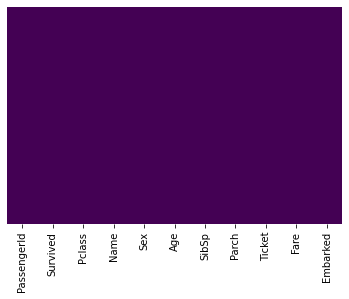

In [11]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


<AxesSubplot:>

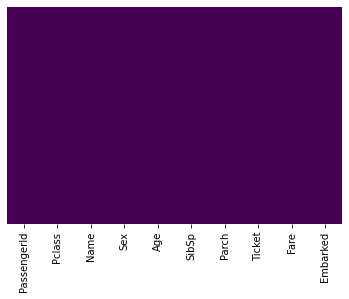

In [12]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### LOS DATOS HAN QUEDADO LIMPIOS, PROCEDEMOS A LA SIGUIENTE FASE

In [13]:
#Voy a crear una copia sobre la que trabajar de los datasets para mantener para el futuro los originales
train_2 = train.copy()
test_2  = test.copy()

<p><center>      ***************      </center></p>
<p><center> FASE PREDICTIVA </center></p>
<p><center>      ***************      </center></p>


En esta fase, vamos a proceder a trabajar con variables numericas, teniendo que modificar columnas para que cumplan esa condición

In [14]:
#Eliminamos la ID del pasajero ya que no nos sirve , usamos la copia de datos para no dañar el original 

train_2 = train_2.drop(['PassengerId'],axis=1)


In [15]:
#Cambiamos el género a numérico de forma sencilla
train_2.loc[train_2.Sex=='female','Sex']=1
train_2.loc[train_2.Sex=='male','Sex']=0
train_2["Sex"] = train_2["Sex"].astype(str).astype(float)



In [16]:
#Cambiamos el tipo de embarque , S,C,Q a 1,2,3 para poder trabajar con el
train_2.loc[train_2.Embarked =='S','Embarked']= 3
train_2.loc[train_2.Embarked =='C','Embarked']=2
train_2.loc[train_2.Embarked =='Q','Embarked']=1
train_2["Embarked"] = train_2["Embarked"].astype(str).astype(float)




In [17]:
#Vamos a comprobar por última vez, si tenemos valores nulos
train_2.isnull().sum()/len(train_2)*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [18]:
#Hacemos lo mismo ahora con el test
test_2['Age'] = test_2['Age'].fillna(test_2['Age'].mean())
test_2['Fare'] = test_2['Fare'].fillna(test_2['Fare'].mean())
test_2.loc[test_2.Sex=='female','Sex']=1
test_2.loc[test_2.Sex=='male','Sex']=0
test_2["Sex"] = test_2["Sex"].astype(str).astype(float)
test_2.loc[test_2.Embarked =='S','Embarked']= 3
test_2.loc[test_2.Embarked =='C','Embarked']=2
test_2.loc[test_2.Embarked =='Q','Embarked']=1
test_2["Embarked"] = test_2["Embarked"].astype(str).astype(float)
test_2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
train_2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0.0,22.000000,1,0,A/5 21171,7.2500,3.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.000000,1,0,PC 17599,71.2833,2.0
2,1,3,"Heikkinen, Miss. Laina",1.0,26.000000,0,0,STON/O2. 3101282,7.9250,3.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.000000,1,0,113803,53.1000,3.0
4,0,3,"Allen, Mr. William Henry",0.0,35.000000,0,0,373450,8.0500,3.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0.0,27.000000,0,0,211536,13.0000,3.0
887,1,1,"Graham, Miss. Margaret Edith",1.0,19.000000,0,0,112053,30.0000,3.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,29.699118,1,2,W./C. 6607,23.4500,3.0
889,1,1,"Behr, Mr. Karl Howell",0.0,26.000000,0,0,111369,30.0000,2.0


In [20]:
test_2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0.0,34.500000,0,0,330911,7.8292,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1.0,47.000000,1,0,363272,7.0000,3.0
2,894,2,"Myles, Mr. Thomas Francis",0.0,62.000000,0,0,240276,9.6875,1.0
3,895,3,"Wirz, Mr. Albert",0.0,27.000000,0,0,315154,8.6625,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,22.000000,1,1,3101298,12.2875,3.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0.0,29.699118,0,0,A.5. 3236,8.0500,3.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1.0,39.000000,0,0,PC 17758,108.9000,2.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0.0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,3.0
416,1308,3,"Ware, Mr. Frederick",0.0,29.699118,0,0,359309,8.0500,3.0


In [25]:
#convert passengerid string to float to avoid errors
test_2['PassengerId'] = test_2['PassengerId'].astype(float)


### Comienza el entrenaminento y la predicción

In [28]:
 #Vamos a tratar el tipo de objeto para evitar errores 
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    return df
label_encoding(train_2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,108,0.0,22.000000,1,0,523,7.2500,3.0
1,1,1,190,1.0,38.000000,1,0,596,71.2833,2.0
2,1,3,353,1.0,26.000000,0,0,669,7.9250,3.0
3,1,1,272,1.0,35.000000,1,0,49,53.1000,3.0
4,0,3,15,0.0,35.000000,0,0,472,8.0500,3.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,0.0,27.000000,0,0,101,13.0000,3.0
887,1,1,303,1.0,19.000000,0,0,14,30.0000,3.0
888,0,3,413,1.0,29.699118,1,2,675,23.4500,3.0
889,1,1,81,0.0,26.000000,0,0,8,30.0000,2.0


In [30]:
label_encoding(test_2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892.0,3,206,0.0,34.500000,0,0,152,7.8292,1.0
1,893.0,3,403,1.0,47.000000,1,0,221,7.0000,3.0
2,894.0,2,269,0.0,62.000000,0,0,73,9.6875,1.0
3,895.0,3,408,0.0,27.000000,0,0,147,8.6625,3.0
4,896.0,3,178,1.0,22.000000,1,1,138,12.2875,3.0
...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3,353,0.0,29.699118,0,0,267,8.0500,3.0
414,1306.0,1,283,1.0,39.000000,0,0,324,108.9000,2.0
415,1307.0,3,332,0.0,38.500000,0,0,346,7.2500,3.0
416,1308.0,3,384,0.0,29.699118,0,0,220,8.0500,3.0


###### La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes

In [31]:
# Regresión logística como modelo de clasificación

train_x= train_2.drop(columns=["Survived"], axis=1)
train_y= train_2["Survived"]

test_x= test_2.drop("PassengerId",axis=1)

logistic = LogisticRegression(solver='lbfgs')
logistic.fit(train_x, train_y)

predictions_LR= logistic.predict(test_x)

print(logistic.score(train_x, train_y))




0.8002244668911336


/home/dm/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Random Forest es un método versátil de aprendizaje automático capaz de realizar tanto tareas de regresión como de clasificación. También lleva a cabo métodos de reducción dimensional, trata valores perdidos, valores atípicos y otros pasos esenciales de exploración de datos.

In [33]:
# Random forest

model_RF = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=2, random_state=2)
model_RF.fit(train_x, train_y)
predictions_RF = model_RF.predict(test_x)

print(model_RF.score(train_x, train_y))



0.8451178451178452


##### KNN trabaja buscando las distancias entre una consulta y todos los ejemplos en los datos, seleccionando el número especificado ejemplos (K) más cercanos a la consulta, luego vota por la etiqueta más frecuente (en el caso de la clasificación) o promedia las etiquetas (en el caso de la regresión).

In [32]:
# Clasificando con K-Nearest-Neighbor

KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(train_x, train_y)
predictions_KNN = KNN_classifier.predict(test_x)

print(KNN_classifier.score(train_x, train_y))

0.8237934904601572


#####  Conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores.

In [34]:
# Gradient Boosting

model_GB = GradientBoostingClassifier(min_samples_leaf=5,max_leaf_nodes=5)
model_GB.fit(train_x, train_y)
predictions_GB = model_GB.predict(test_x)

print(model_GB.score(train_x, train_y))

0.8956228956228957


#####  implementación de código abierto popular y eficiente del algoritmo de gradiente de árboles reforzados. Gradient boosting es un algoritmo de aprendizaje supervisado, que intenta predecir con precisión una variable objetivo combinando las estimaciones de un conjunto de modelos más simples y débiles.

In [35]:
# XGBoost 

model_XGB = XGBClassifier(learning_rate=0.005, use_label_encoder=False, n_estimators=1000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=30)

model_XGB.fit(train_x, train_y)
predictions_XGB = model_XGB.predict(test_x)

print(model_XGB.score(train_x, train_y))

0.8911335578002245


In [37]:
# Predicciones finales

predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions_XGB)]
model_XGB.fit(test_x,predictions)
predictions = model_XGB.predict(test_x)
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions)]

In [38]:
# Enviamos
output= pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions})
output.to_csv("Submission.csv", index=False)